In [8]:
import numpy as np
import fiftyone as fo
from fiftyone import ViewField as F
from dataloaders import HorizonDataset
from torch.utils.data import DataLoader
from torchvision import transforms as T

In [15]:
def transforms(img, target):
    # TODO: complete this function
    # letterbox transform (640 x 640)
    # target transform: points --> pitch, theta

    # transform image
    img = T.Compose(
        [
            T.CenterCrop(512),
            T.ToTensor(),
        ]
    )(img)

    # transform target
    target = np.array(target)

    return img, target


dataset = HorizonDataset(
    dataset=(fo.load_dataset("TRAIN_THERMAL_DATASET_2023_06")
             .match(F("ground_truth_pl.polylines.closed") == [False])),  # only open polylines
    transforms=transforms
)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

In [16]:
for img, target in dataloader:
    # TODO: reconstruct image (visible 8bit)
    # TODO: go from pitch, theta --> points
    # TODO: plot horizon on image
    print(img.shape, target.shape)
    break

torch.Size([1, 1, 512, 512]) torch.Size([1, 2, 2])


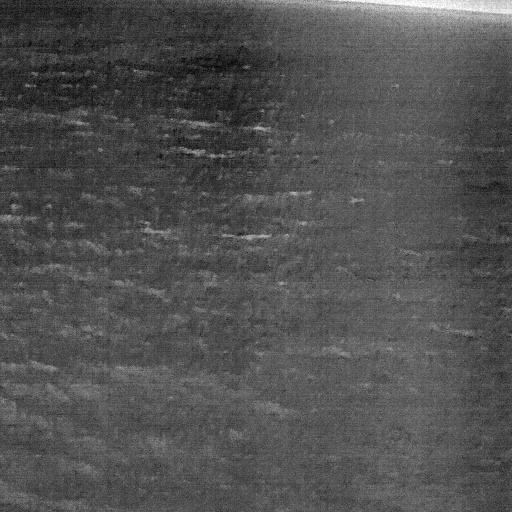

In [22]:
from PIL import Image

Image.fromarray((img.squeeze().numpy() * 255).astype(np.uint8))